<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xls to data (1).xls


In [ ]:
xlsx = pd.read_excel(r'data.xls')

In [ ]:
type(xlsx)
print(len(xlsx))

856


In [ ]:
xlsx.tail()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
851,2017/01/06,"1,810,000","32,000","177,619","321,737,489,344","1,809,000","1,822,000","1,802,000","254,629,600","140,679,337"
852,2017/01/05,"1,778,000","-30,000","219,349","392,320,929,368","1,803,000","1,803,000","1,777,000","250,127,861","140,679,337"
853,2017/01/04,"1,808,000","-16,000","159,435","289,084,849,500","1,825,000","1,826,000","1,805,000","254,348,241","140,679,337"
854,2017/01/03,"1,824,000","19,000","147,153","267,688,372,000","1,814,000","1,831,000","1,801,000","256,599,111","140,679,337"
855,2017/01/02,"1,805,000","3,000","93,012","167,931,825,000","1,799,000","1,812,000","1,794,000","253,926,203","140,679,337"


In [ ]:
xlsx.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2020/06/30,"52,800",400,"21,157,172","1,129,431,038,800","53,900","53,900","52,800","315,204,519","5,969,782,550"
1,2020/06/29,"52,400",-900,"17,776,925","934,880,364,880","52,500","53,200","52,000","312,816,606","5,969,782,550"
2,2020/06/26,"53,300","1,400","21,575,360","1,146,335,751,523","52,800","53,900","52,200","318,189,410","5,969,782,550"
3,2020/06/25,"51,900","-1,000","18,541,624","970,494,909,540","52,100","53,000","51,900","309,831,714","5,969,782,550"
4,2020/06/24,"52,900","1,500","24,519,552","1,301,305,533,100","51,900","53,900","51,600","315,801,497","5,969,782,550"


In [ ]:
xlsx = xlsx.rename(columns={"년/월/일" : "day", "종가":"close", "대비":"dif", "거래량(주)":"volume", "시가":"start", "고가":"high", "저가":"low"})

In [ ]:
del xlsx["거래대금(원)"]
del xlsx["시가총액(백만)"]
del xlsx["상장주식수(주)"]

In [ ]:
from datetime import datetime

In [ ]:
xlsx.loc[0, "day"]

'2020/06/30'

In [ ]:
strpDateTime = datetime.strptime("2020/06/30", "%Y/%m/%d")


In [ ]:
type(strpDateTime)

datetime.datetime

In [ ]:
print(strpDateTime)

2020-06-30 00:00:00


In [ ]:
for i in range(0, len(xlsx)):
  xlsx.loc[i, 'day'] = datetime.strptime(xlsx.loc[i,'day'], "%Y/%m/%d")


In [ ]:
xlsx

,day,close,dif,volume,start,high,low
0,2020-06-30 00:00:00,"52,800",400,"21,157,172","53,900","53,900","52,800"
1,2020-06-29 00:00:00,"52,400",-900,"17,776,925","52,500","53,200","52,000"
2,2020-06-26 00:00:00,"53,300","1,400","21,575,360","52,800","53,900","52,200"
3,2020-06-25 00:00:00,"51,900","-1,000","18,541,624","52,100","53,000","51,900"
4,2020-06-24 00:00:00,"52,900","1,500","24,519,552","51,900","53,900","51,600"
...,...,...,...,...,...,...,...
851,2017-01-06 00:00:00,"1,810,000","32,000","177,619","1,809,000","1,822,000","1,802,000"
852,2017-01-05 00:00:00,"1,778,000","-30,000","219,349","1,803,000","1,803,000","1,777,000"
853,2017-01-04 00:00:00,"1,808,000","-16,000","159,435","1,825,000","1,826,000","1,805,000"
854,2017-01-03 00:00:00,"1,824,000","19,000","147,153","1,814,000","1,831,000","1,801,000"


In [ ]:
sprice = xlsx[:511] # 2018년 6월1일부터 시작된 데이터만 사용

In [ ]:
sprice_s = sprice[::-1] #데이터를 시간순서로 정렬

In [ ]:
sprice_s.head()

,day,close,dif,volume,start,high,low
510,2018-06-01 00:00:00,"51,300",600,"13,038,499","50,500","51,700","49,950"
509,2018-06-04 00:00:00,"51,100",-200,"9,767,171","50,800","51,200","50,700"
508,2018-06-05 00:00:00,"51,300",200,"9,144,100","51,100","51,400","50,400"
507,2018-06-07 00:00:00,"50,600",-700,"13,590,016","51,800","51,800","50,500"
506,2018-06-08 00:00:00,"49,650",-950,"16,951,706","50,200","50,400","49,600"


In [ ]:
import numpy as np

In [ ]:
float(sprice_s.loc[0, 'close'].replace(",", ''))

52800.0

In [ ]:
for i in range(0, len(sprice_s)):
  sprice_s.loc[i, 'close'] = float(sprice_s.loc[i, 'close'].replace(",", ''))
  sprice_s.loc[i, 'dif'] = float(sprice_s.loc[i, 'dif'].replace(",", ''))
  sprice_s.loc[i, 'volume'] = float(sprice_s.loc[i, 'volume'].replace(",", ''))
  sprice_s.loc[i, 'start'] = float(sprice_s.loc[i, 'start'].replace(",", ''))
  sprice_s.loc[i, 'high'] = float(sprice_s.loc[i, 'high'].replace(",", ''))
  sprice_s.loc[i, 'low'] = float(sprice_s.loc[i, 'low'].replace(",", ''))
 

In [ ]:
sprice_s

,day,close,dif,volume,start,high,low
510,2018-06-01 00:00:00,51300,600,1.30385e+07,50500,51700,49950
509,2018-06-04 00:00:00,51100,-200,9.76717e+06,50800,51200,50700
508,2018-06-05 00:00:00,51300,200,9.1441e+06,51100,51400,50400
507,2018-06-07 00:00:00,50600,-700,1.359e+07,51800,51800,50500
506,2018-06-08 00:00:00,49650,-950,1.69517e+07,50200,50400,49600
...,...,...,...,...,...,...,...
4,2020-06-24 00:00:00,52900,1500,2.45196e+07,51900,53900,51600
3,2020-06-25 00:00:00,51900,-1000,1.85416e+07,52100,53000,51900
2,2020-06-26 00:00:00,53300,1400,2.15754e+07,52800,53900,52200
1,2020-06-29 00:00:00,52400,-900,1.77769e+07,52500,53200,52000


로컬 PC에 데이터를 저장하는 방법이다.

In [ ]:
sprice_s.to_csv('new_file.txt')
files.download('new_file.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

NameError: ignored

In [ ]:
data = pd.read_csv('new_file.txt')

In [ ]:
data[390:410]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,close,dif,volume,start,high,low
390,390,390,120,2020-01-06 00:00:00,55500.0,0.0,10278951.0,54900.0,55600.0,54600.0
391,391,391,119,2020-01-07 00:00:00,55800.0,300.0,10009778.0,55700.0,56400.0,55600.0
392,392,392,118,2020-01-08 00:00:00,56800.0,1000.0,23501171.0,56200.0,57400.0,55900.0
393,393,393,117,2020-01-09 00:00:00,58600.0,1800.0,24102579.0,58400.0,58600.0,57400.0
394,394,394,116,2020-01-10 00:00:00,59500.0,900.0,16000170.0,58800.0,59700.0,58300.0
395,395,395,115,2020-01-13 00:00:00,60000.0,500.0,11359139.0,59600.0,60000.0,59100.0
396,396,396,114,2020-01-14 00:00:00,60000.0,0.0,16906295.0,60400.0,61000.0,59900.0
397,397,397,113,2020-01-15 00:00:00,59000.0,-1000.0,14300928.0,59500.0,59600.0,58900.0
398,398,398,112,2020-01-16 00:00:00,60700.0,1700.0,14381774.0,59100.0,60700.0,59000.0
399,399,399,111,2020-01-17 00:00:00,61300.0,600.0,16025661.0,61900.0,62000.0,61000.0


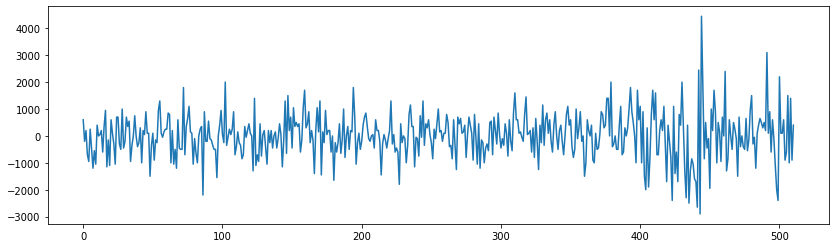

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.plot(data['dif'])
plt.show()

In [ ]:
y_data = data.loc[1:501, 'dif']  # y는 종가의 차이로 전날에 영향을 받는다고 가정한다

In [ ]:
data.loc[401,:] # y_data의 validation 기준일은 20년 1월 21이고 종가는 61400원이고 전날 대비 1000원 하락했다.

Unnamed: 0                        401
Unnamed: 0.1                      401
Unnamed: 0.1.1                    109
day               2020-01-21 00:00:00
close                           61400
dif                             -1000
volume                    1.11427e+07
start                           62000
high                            62400
low                             61200
Name: 401, dtype: object

In [ ]:
x_data = data.loc[0:500, ['close', 'volume', 'start', 'high', 'low']]

In [ ]:
x_data  = np.asarray(x_data, dtype=float)

In [ ]:
y_data  = np.asarray(y_data, dtype=float)

In [ ]:
print(x_data.shape, y_data.shape)

(501, 5) (501,)


In [ ]:
x_train = x_data[0:400]
x_val = x_data[400:500]
print(x_train.shape, x_val.shape)

(400, 5) (100, 5)


In [ ]:
y_train = y_data[0:400]
y_val = y_data[400:500]

In [ ]:
y_val[0]

-1000.0

In [ ]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train-mean)/std

x_val = (x_val-mean)/std

In [ ]:
x_train[0:5]

array([[ 1.2268386 ,  0.49281082,  1.03245529,  1.21973112,  1.01758591],
       [ 1.17788744, -0.31375125,  1.10571587,  1.09754112,  1.20267445],
       [ 1.2268386 , -0.46737248,  1.17897645,  1.14641712,  1.12863903],
       [ 1.05550952,  0.62879006,  1.34991781,  1.24416912,  1.1533175 ],
       [ 0.82299148,  1.45763133,  0.95919471,  0.90203712,  0.93121126]])

In [ ]:
x_train = x_train.reshape(-1,1,5) 
x_val = x_val.reshape(-1,1,5) # LSTM으로 들어가기 위해서 자료의 형태를 맞추어 준다. (샘플수, 타입스텝 수, 각 타입스텝의 특성수 )

In [ ]:
x_train[0:5]

array([[[ 1.2268386 ,  0.49281082,  1.03245529,  1.21973112,
          1.01758591]],

       [[ 1.17788744, -0.31375125,  1.10571587,  1.09754112,
          1.20267445]],

       [[ 1.2268386 , -0.46737248,  1.17897645,  1.14641712,
          1.12863903]],

       [[ 1.05550952,  0.62879006,  1.34991781,  1.24416912,
          1.1533175 ]],

       [[ 0.82299148,  1.45763133,  0.95919471,  0.90203712,
          0.93121126]]])

In [ ]:
print(x_train.shape)

(400, 1, 5)


In [ ]:
from keras.layers import LSTM, Dense, Input
from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras import Input

In [ ]:
input1 = Input(shape=(1,5))
#dense1 = LSTM(120)(input1)
dense1 = LSTM(30)(input1)
dense1 = Dense(20)(dense1)
#model.add(LSTM(60, input_shape=(1,5)))  # input_shape는 타임스텝수, 특성의 수
#model.add(LSTM(20))
output = Dense(1)(dense1)

model = Model(inputs= input1, outputs=output)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                4320      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='LSTM_stock_model.h5', monitor='val_mae', save_best_only=True),tf.keras.callbacks.EarlyStopping(patience=1)]
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=500, verbose=0)

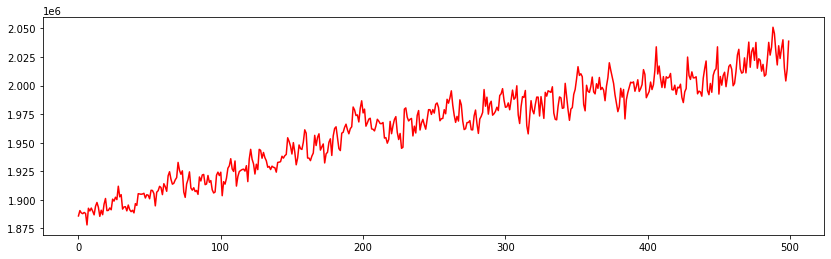

In [ ]:
#plt.plot(history.history['loss'], 'b') 
plt.plot(history.history['val_loss'], 'r')
plt.show()

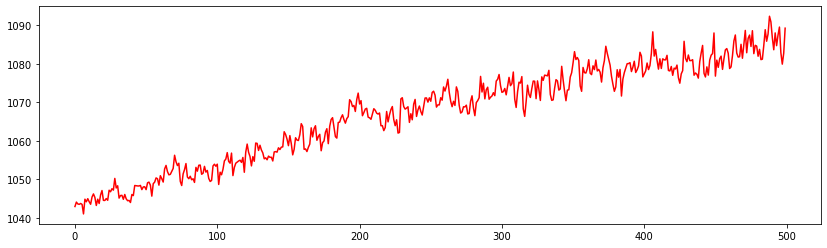

In [ ]:
#plt.plot(history.history['mae'], 'b') 
plt.plot(history.history['val_mae'], 'r')
plt.show()

In [ ]:
y_hat = model.predict(x_val)

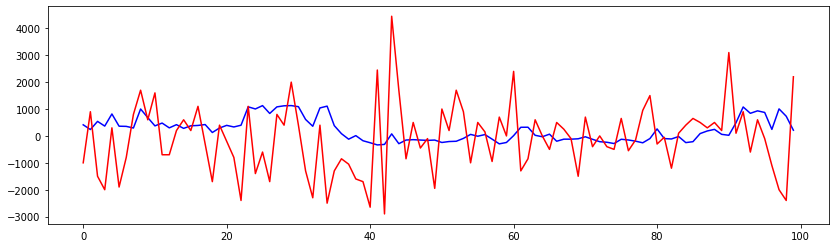

In [ ]:
plt.plot(y_hat, 'b') 
plt.plot(y_val, 'r')
plt.show()

In [ ]:
data.loc[400,:] #20년 1월20일 종가는 62400원이었다

Unnamed: 0                      400
Unnamed: 0.1                    110
day             2020-01-20 00:00:00
close                         62400
dif                            1100
volume                  1.25289e+07
start                         62000
high                          62800
low                           61700
Name: 400, dtype: object

In [ ]:
price_hats = []
price_start = 62400.0

for i in range(0, len(y_hat)):
  price_start = price_start + y_hat[i]
  price_hats.append(price_start)


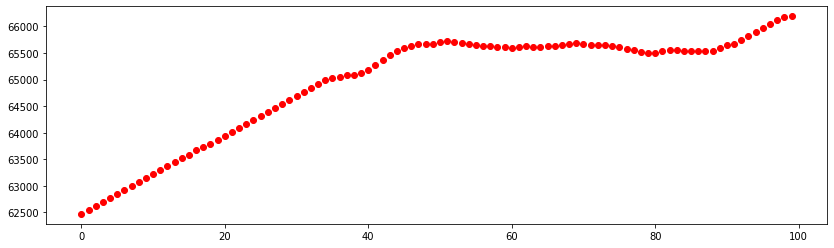

In [ ]:
plt.plot(price_hats, 'ro')
plt.show()

In [ ]:
 data.loc[401:500,['day','close']] # 20년 1월21일 부터 시작하여 100일간 종가 필요

,day,close
401,2020-01-21 00:00:00,61400.0
402,2020-01-22 00:00:00,62300.0
403,2020-01-23 00:00:00,60800.0
404,2020-01-28 00:00:00,58800.0
405,2020-01-29 00:00:00,59100.0
...,...,...
496,2020-06-10 00:00:00,55400.0
497,2020-06-11 00:00:00,54300.0
498,2020-06-12 00:00:00,52300.0
499,2020-06-15 00:00:00,49900.0


In [ ]:
price_real = data.loc[401:500, 'close']
price_real = np.asarray(price_real, dtype=float)

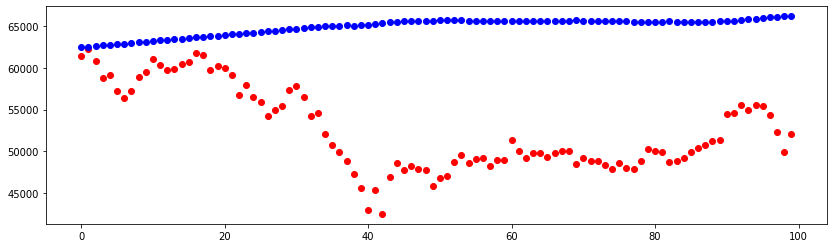

In [ ]:
plt.plot(price_real, 'ro')
plt.plot(price_hats, 'bo')
plt.show()

아래는 Colab 구글 드라이브에 Data를 저장하고 다운로드 하는 방법이다.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!ls /gdrive

'My Drive'


In [ ]:
data.to_csv('/gdrive/My Drive/data.txt')

In [2]:
!ls /gdrive/My\ Drive/data.txt

'/gdrive/My Drive/data.txt'


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/gdrive/My Drive/data.txt')

In [5]:
data.tail(10) # 2018년 6월1일부터 2020년 6월30일까지 삼성전자 주가 자료이다

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,close,dif,volume,start,high,low
501,501,501,9,2020-06-17 00:00:00,52200.0,100.0,26672595.0,52100.0,52900.0,51300.0
502,502,502,8,2020-06-18 00:00:00,52300.0,100.0,15982926.0,52200.0,52300.0,51600.0
503,503,503,7,2020-06-19 00:00:00,52900.0,600.0,18157985.0,52600.0,52900.0,51600.0
504,504,504,6,2020-06-22 00:00:00,52000.0,-900.0,13801350.0,52000.0,52600.0,51800.0
505,505,505,5,2020-06-23 00:00:00,51400.0,-600.0,18086152.0,52500.0,52800.0,51100.0
506,506,506,4,2020-06-24 00:00:00,52900.0,1500.0,24519552.0,51900.0,53900.0,51600.0
507,507,507,3,2020-06-25 00:00:00,51900.0,-1000.0,18541624.0,52100.0,53000.0,51900.0
508,508,508,2,2020-06-26 00:00:00,53300.0,1400.0,21575360.0,52800.0,53900.0,52200.0
509,509,509,1,2020-06-29 00:00:00,52400.0,-900.0,17776925.0,52500.0,53200.0,52000.0
510,510,510,0,2020-06-30 00:00:00,52800.0,400.0,21157172.0,53900.0,53900.0,52800.0


다른 data 셀을 만들려고 한다.

In [6]:
data_n = data.loc[:, ["close", "volume", "start", "high", "low"]]

In [7]:
data_n

,close,volume,start,high,low
0,51300.0,13038499.0,50500.0,51700.0,49950.0
1,51100.0,9767171.0,50800.0,51200.0,50700.0
2,51300.0,9144100.0,51100.0,51400.0,50400.0
3,50600.0,13590016.0,51800.0,51800.0,50500.0
4,49650.0,16951706.0,50200.0,50400.0,49600.0
...,...,...,...,...,...
506,52900.0,24519552.0,51900.0,53900.0,51600.0
507,51900.0,18541624.0,52100.0,53000.0,51900.0
508,53300.0,21575360.0,52800.0,53900.0,52200.0
509,52400.0,17776925.0,52500.0,53200.0,52000.0


In [8]:
import numpy as np

In [9]:
# 변동성 데이터 만들기
tr_list=[]

for i in range(0, len(data_n)):
  if i == 0:
    tr = data_n.loc[i, 'high'] - data_n.loc[i, 'low']
  else:
    tr1 = data_n.loc[i, 'high'] - data_n.loc[i, 'low']
    tr2 = data_n.loc[i, 'high'] - data_n.loc[i-1, 'close']
    tr3 = data_n.loc[i, 'low'] - data_n.loc[i-1, 'close']
    tr = max(tr1, abs(tr2), abs(tr3))
  tr_list.append(tr)


In [10]:
tr_list[0]

1750.0

In [11]:
for i in range(0, len(data_n)):
  data_n.loc[i,'tr'] = tr_list[i]

In [12]:
data_n.head()

,close,volume,start,high,low,tr
0,51300.0,13038499.0,50500.0,51700.0,49950.0,1750.0
1,51100.0,9767171.0,50800.0,51200.0,50700.0,600.0
2,51300.0,9144100.0,51100.0,51400.0,50400.0,1000.0
3,50600.0,13590016.0,51800.0,51800.0,50500.0,1300.0
4,49650.0,16951706.0,50200.0,50400.0,49600.0,1000.0


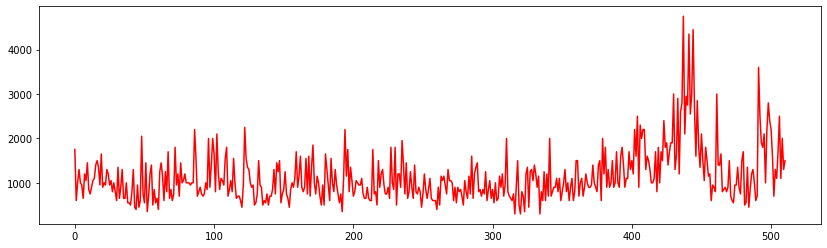

In [13]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)

plt.plot(tr_list, 'r')
plt.show()

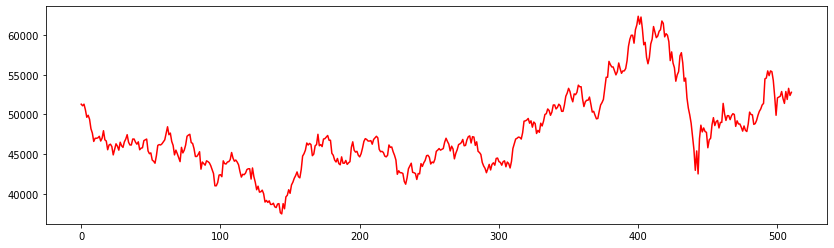

In [14]:
plt.plot(data_n.loc[:,'close'], 'r')
plt.show()

In [15]:
len(data_n)

511

In [16]:
data_n = np.asarray(data_n, dtype=float)

In [17]:
data_n[0:5]

array([[5.1300000e+04, 1.3038499e+07, 5.0500000e+04, 5.1700000e+04,
        4.9950000e+04, 1.7500000e+03],
       [5.1100000e+04, 9.7671710e+06, 5.0800000e+04, 5.1200000e+04,
        5.0700000e+04, 6.0000000e+02],
       [5.1300000e+04, 9.1441000e+06, 5.1100000e+04, 5.1400000e+04,
        5.0400000e+04, 1.0000000e+03],
       [5.0600000e+04, 1.3590016e+07, 5.1800000e+04, 5.1800000e+04,
        5.0500000e+04, 1.3000000e+03],
       [4.9650000e+04, 1.6951706e+07, 5.0200000e+04, 5.0400000e+04,
        4.9600000e+04, 1.0000000e+03]])

In [18]:
data_n.shape

(511, 6)

5일치 주가를 타입스텝으로 가진 데이터를 만들려고 한다. 이경우 RNN과 같이 전체 데이터는 5개의 특징을 가진 샘플데이터가 한꺼번에 LSTM네트워크에 들어가고 타입스템 수 만큼 학습이 진행된다.

In [19]:
data_n_L = []

for i in range(0, len(data_n)):
  if i < len(data_n)-4:
    ts = [data_n[i], data_n[i+1], data_n[i+2], data_n[i+3], data_n[i+4]]
    data_n_L.append(ts)

In [20]:
data_n_L[0]

[array([5.1300000e+04, 1.3038499e+07, 5.0500000e+04, 5.1700000e+04,
        4.9950000e+04, 1.7500000e+03]),
 array([5.110000e+04, 9.767171e+06, 5.080000e+04, 5.120000e+04,
        5.070000e+04, 6.000000e+02]),
 array([5.1300e+04, 9.1441e+06, 5.1100e+04, 5.1400e+04, 5.0400e+04,
        1.0000e+03]),
 array([5.0600000e+04, 1.3590016e+07, 5.1800000e+04, 5.1800000e+04,
        5.0500000e+04, 1.3000000e+03]),
 array([4.9650000e+04, 1.6951706e+07, 5.0200000e+04, 5.0400000e+04,
        4.9600000e+04, 1.0000000e+03])]

In [ ]:
len(data_n_L)

507

In [21]:
data_n_d = data.loc[:, ["dif"]]

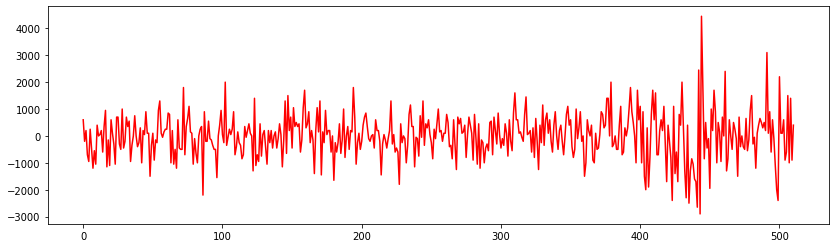

In [22]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)

plt.plot(data_n_d, 'r')
plt.show()

In [23]:
np.std(data_n_d[400:]) #400번이후의 표준편차가 더 크다

dif    1257.926576
dtype: float64

In [24]:
data_n_d.head(6)

,dif
0,600.0
1,-200.0
2,200.0
3,-700.0
4,-950.0
5,250.0


In [25]:
data_n_d_L = data_n_d[5:] # 5일 전 데이타가 x 이고 이를 가지고 익일 y를 추정하는 것이라 하루 지난 값이 y가 된다.

In [26]:
data_n_d_L = np.asarray(data_n_d_L, dtype=float)

In [27]:
[data_n_L[0], data_n_d_L[0]]

[[array([5.1300000e+04, 1.3038499e+07, 5.0500000e+04, 5.1700000e+04,
         4.9950000e+04, 1.7500000e+03]),
  array([5.110000e+04, 9.767171e+06, 5.080000e+04, 5.120000e+04,
         5.070000e+04, 6.000000e+02]),
  array([5.1300e+04, 9.1441e+06, 5.1100e+04, 5.1400e+04, 5.0400e+04,
         1.0000e+03]),
  array([5.0600000e+04, 1.3590016e+07, 5.1800000e+04, 5.1800000e+04,
         5.0500000e+04, 1.3000000e+03]),
  array([4.9650000e+04, 1.6951706e+07, 5.0200000e+04, 5.0400000e+04,
         4.9600000e+04, 1.0000000e+03])],
 array([250.])]

In [28]:
len(data_n_d_L) # y가 익일 데이터이므로 전체 자료수는 x보다 한개 작다

506

In [29]:
x_train_L5 = data_n_L[0:400]
x_val_L5 = data_n_L[400:500]
y_train_L5= data_n_d_L[0:400]
y_val_L5 = data_n_d_L[400:500]

In [30]:
print(y_val_L5[0], x_val_L5[0][4]) 

[300.] [5.8800000e+04 2.3664541e+07 5.9400000e+04 5.9400000e+04 5.8300000e+04
 2.5000000e+03]


In [31]:
data[400:410] # y_val_L5는 20년 1월29일부터 시작하고, 전날의 종가는 58800원이다

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,close,dif,volume,start,high,low
400,400,400,110,2020-01-20 00:00:00,62400.0,1100.0,12528855.0,62000.0,62800.0,61700.0
401,401,401,109,2020-01-21 00:00:00,61400.0,-1000.0,11142693.0,62000.0,62400.0,61200.0
402,402,402,108,2020-01-22 00:00:00,62300.0,900.0,15339565.0,60500.0,62600.0,60400.0
403,403,403,107,2020-01-23 00:00:00,60800.0,-1500.0,14916555.0,61800.0,61800.0,60700.0
404,404,404,106,2020-01-28 00:00:00,58800.0,-2000.0,23664541.0,59400.0,59400.0,58300.0
405,405,405,105,2020-01-29 00:00:00,59100.0,300.0,16446102.0,59100.0,59700.0,58800.0
406,406,406,104,2020-01-30 00:00:00,57200.0,-1900.0,20821939.0,58800.0,58800.0,56800.0
407,407,407,103,2020-01-31 00:00:00,56400.0,-800.0,19749457.0,57800.0,58400.0,56400.0
408,408,408,102,2020-02-03 00:00:00,57200.0,800.0,23995260.0,55500.0,57400.0,55200.0
409,409,409,101,2020-02-04 00:00:00,58900.0,1700.0,21800192.0,57100.0,59000.0,56800.0


정규화를 한다.

In [32]:
mean_L5 = np.mean(x_train_L5, axis=0)
std_L5 = np.std(x_train_L5, axis=0)

x_train_L5_r = (x_train_L5 - mean_L5)/std_L5
x_val_L5_r = (x_val_L5 - mean_L5)/std_L5

In [123]:
#import numpy as np

import keras
from keras.layers import LSTM, Dense, Input, Dropout
from keras import Model
#from keras.models import Sequential
#from keras import layers
from keras import Input
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [118]:
print(keras.__version__)
print(tf.__version__)

2.3.1
2.2.0


In [119]:
# 아래의 LSTM은 5개의 time step이 입력되고 이에 대해서 한개의 dif가 대응되는 many-to-one이다. return_sequence=False이다.
# 만약 many-to-many로 진행될 경우, dif가 여러개 dif가 대응된다. 이경우 return_sequence=True이다. 

input2 = Input(shape=(5,6))
dense2 = LSTM(128, return_sequences=False)(input2)
dense2 = Dense(128)(dense2)
dense2 = Dense(64)(dense2)
dense2 = Dropout(0.5)(dense2)
dense2 = Dense(32)(dense2)
output2 = Dense(1)(dense2)

model = Model(inputs= input2, outputs=output2)
model.summary() # LSTM은 (5*128 + 128*128 + 128)을 가진 4개 게이트를 가지므로 68608개 파라미터를 가진다.

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 5, 6)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               69120     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33  

In [114]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)


In [121]:
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [135]:
#callback_list = tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', monitor='val_mae', save_best_only=True, save_weights_only=True, verbose=0)
callback_list = ModelCheckpoint(filepath='my_model.h5', monitor='val_mae', save_best_only=True, save_weights_only=True, verbose=0)
early_stopping = EarlyStopping(monitor='val_mae', patience=50)
history = model.fit(x_train_L5_r, y_train_L5, validation_data = (x_val_L5_r, y_val_L5), epochs=200, verbose=0, callbacks=[callback_list, early_stopping])

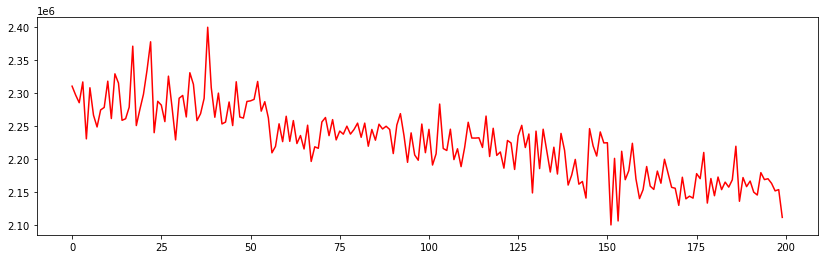

In [136]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)


#plt.plot(history.history['loss'], 'b') 
plt.plot(history.history['val_loss'], 'r')
plt.show()

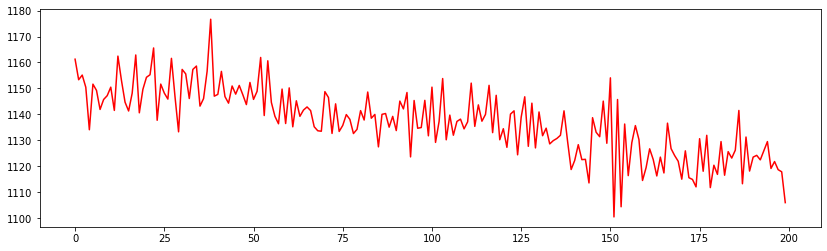

In [137]:
#plt.plot(history.history['mae'], 'b') 
plt.plot(history.history['val_mae'], 'r')
plt.show()

In [138]:
np.min(history.history['val_mae']) # validation set에서 최저 mae값

1100.45751953125

In [139]:
history.history['val_mae'][-1]

1105.9638671875

In [128]:
model.save_weights("my_model.h5") 
# 모델을 다시 저장하면 않될 수 도 있다. 최초에 한번 저장하고 난후, 그 다음부터는 callback과 fitting을 순차적으로 진행하면 자동으로 가충치는 LSTM에 저장된다. 

In [95]:
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [140]:
model.load_weights("my_model.h5") # 저장된 weight를 기존 모델에 적용한다.

In [141]:
model.evaluate(x_val_L5_r, y_val_L5, verbose=0) # 이전에 가중치를 그대로 사용하려면 fit을 다시 하면 안되고 evaluate하여야 한다.

[2100777.1125, 1100.45751953125]

In [ ]:
predict_val = model.predict(x_val_L5_r)

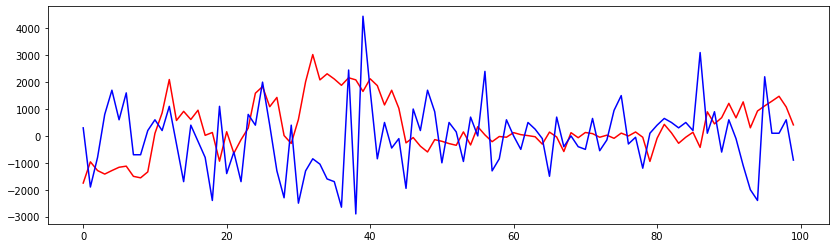

In [ ]:
plt.plot(predict_val, 'r')
plt.plot(y_val_L5, 'b')
plt.show()

In [ ]:
len(predict_val)

100

In [ ]:
p_val= 58800
predict_price=[]

for i in range(0, len(predict_val)):
  p_val = p_val + predict_val[i]
  predict_price.append(p_val)

In [ ]:
actual = np.asarray(data.loc[405:, 'close'], dtype=float)

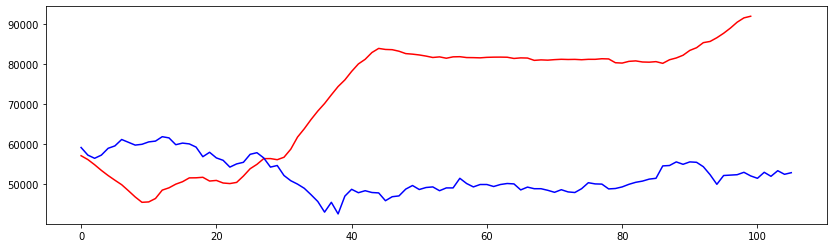

In [ ]:
plt.plot(predict_price, 'r')
plt.plot(actual, 'b')
plt.show()

In [ ]:
actual

array([59100., 57200., 56400., 57200., 58900., 59500., 61100., 60400.,
       59700., 59900., 60500., 60700., 61800., 61500., 59800., 60200.,
       60000., 59200., 56800., 57900., 56500., 55900., 54200., 55000.,
       55400., 57400., 57800., 56500., 54200., 54600., 52100., 50800.,
       49950., 48900., 47300., 45600., 42950., 45400., 42500., 46950.,
       48650., 47800., 48300., 47850., 47750., 45800., 46800., 47000.,
       48700., 49600., 48600., 49100., 49250., 48300., 49000., 49000.,
       51400., 50100., 49250., 49850., 49850., 49350., 49850., 50100.,
       50000., 48500., 49200., 48800., 48800., 48400., 47900., 48550.,
       48000., 47850., 48800., 50300., 50000., 49950., 48750., 48850.,
       49250., 49900., 50400., 50700., 51200., 51400., 54500., 54600.,
       55500., 54900., 55500., 55400., 54300., 52300., 49900., 52100.,
       52200., 52300., 52900., 52000., 51400., 52900., 51900., 53300.,
       52400., 52800.])

In [ ]:
import os
print(os.getcwd())

/content
